<a href="https://colab.research.google.com/github/AnuragPhukan/Research_Methods_CW2/blob/main/Research_Methods_Coursework_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from IPython.display import IFrame
from google.colab import files

In [2]:
# Define the URL where the CSV file is located
url = "https://raw.githubusercontent.com/AnuragPhukan/Research_Methods_CW2/main/Dataset/Results_21Mar2022.csv"

# Read the CSV file at the URL into a DataFrame
df = pd.read_csv(url)

# Display the first few rows of the DataFrame
print(df.head())

   mc_run_id           grouping  mean_ghgs  mean_land  mean_watscar  \
0          1  fish_female_20-29   5.421821   8.612772   14165.86240   
1          1  fish_female_30-39   5.436673   8.680248   15222.77063   
2          1  fish_female_40-49   5.289333   8.467723   15818.80068   
3          1  fish_female_50-59   5.169020   8.219199   16962.06009   
4          1  fish_female_60-69   5.380268   8.570718   18212.66232   

    mean_eut  mean_ghgs_ch4  mean_ghgs_n2o    mean_bio  mean_watuse  ...  \
0  23.945372       1.164643       0.343663  476.270413   679.923479  ...   
1  24.305262       1.154118       0.326868  467.923201   709.343785  ...   
2  24.191105       1.108404       0.310324  438.659832   707.925368  ...   
3  24.748154       1.032501       0.298130  395.787622   720.825105  ...   
4  25.559430       1.098828       0.310735  421.176867   749.392826  ...   

     sd_eut  sd_ghgs_ch4  sd_ghgs_n2o      sd_bio   sd_watuse   sd_acid  \
0  8.167013     0.632547     0.146827  28

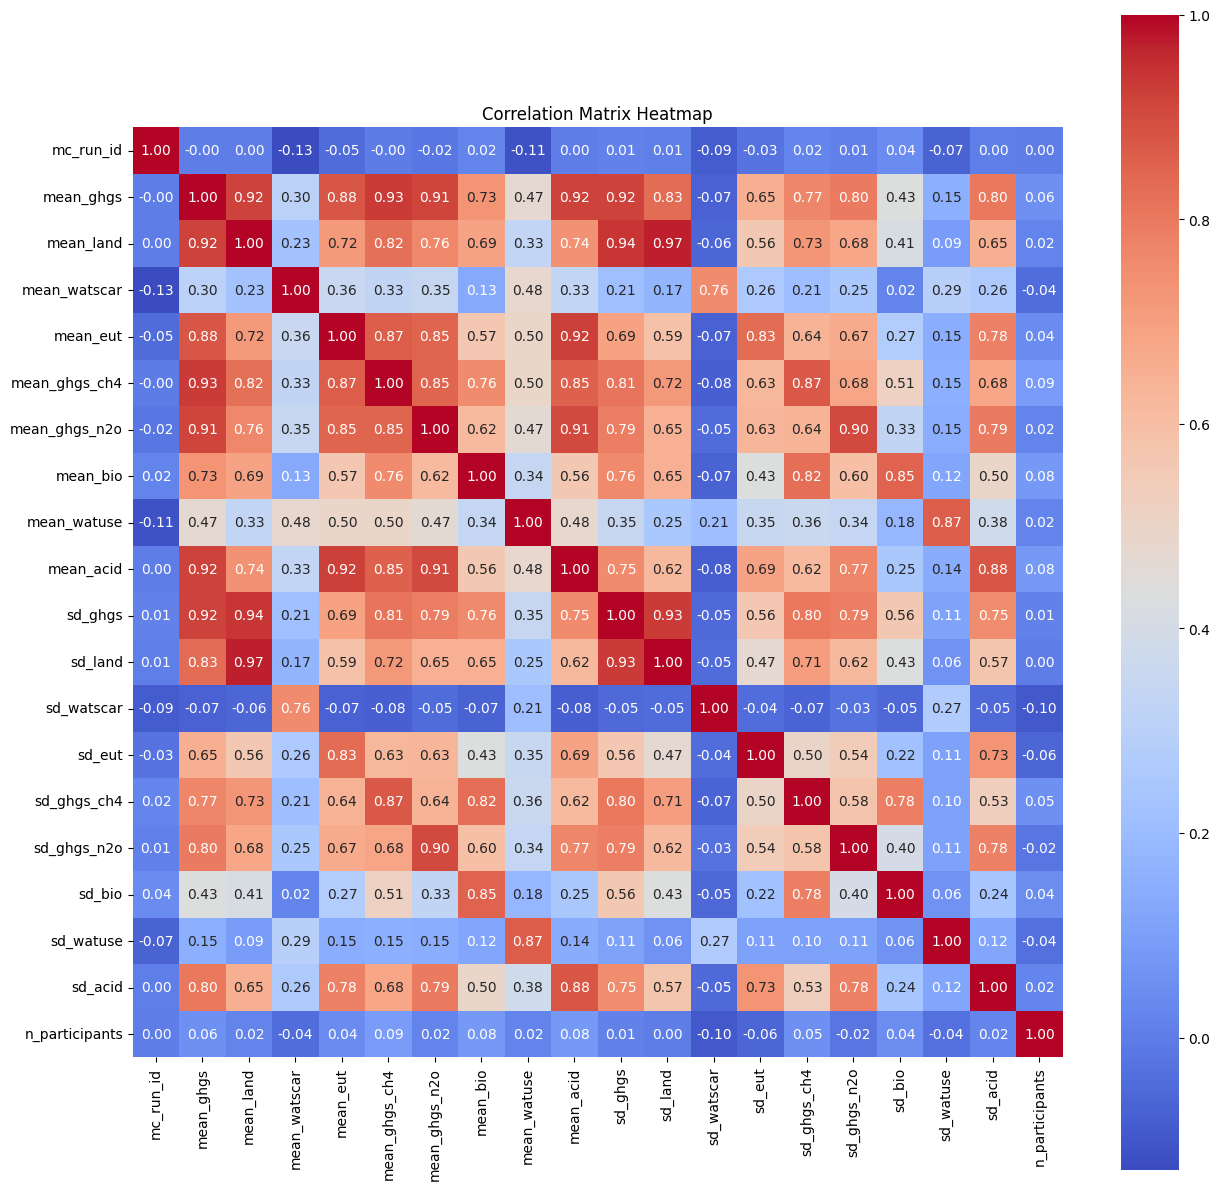

In [ ]:
# Select only numeric columns for the correlation matrix
numeric_df = df.select_dtypes(include=[np.number])

# Calculate the correlation matrix for numeric columns only
correlation_matrix_numeric = numeric_df.corr()

# Function to identify highly correlated columns
def identify_highly_correlated(df, threshold=0.9, exclude_outliers=[]):
    # Calculate the correlation matrix
    corr_matrix = df.corr().abs()  # Take absolute value to consider both directions

    # Find pairs of highly correlated features
    high_corr_pairs = set()
    for i in range(len(corr_matrix.columns)):
        for j in range(i+1, len(corr_matrix.columns)):
            if corr_matrix.iloc[i, j] >= threshold and corr_matrix.columns[j] not in exclude_outliers:
                high_corr_pairs.add((corr_matrix.columns[i], corr_matrix.columns[j]))

    # Suggest which columns to remove (not removing columns flagged with outliers)
    to_remove = set()
    for col1, col2 in high_corr_pairs:
        if col1 not in exclude_outliers:
            to_remove.add(col1)
        if col2 not in exclude_outliers:
            to_remove.add(col2)

    return high_corr_pairs, to_remove

high_corr_pairs, suggested_removals = identify_highly_correlated(numeric_df, threshold=0.9, exclude_outliers=['mean_ghgs_n2o'])

# Plotting the heatmap
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix_numeric, annot=True, fmt='.2f', square=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

In [ ]:
print("Highly correlated pairs:")
print(high_corr_pairs)

print("\nSuggested columns to remove:")
print(suggested_removals)

Highly correlated pairs:
{('mean_ghgs_n2o', 'sd_ghgs_n2o'), ('mean_ghgs', 'mean_ghgs_ch4'), ('mean_ghgs', 'mean_land'), ('mean_ghgs', 'mean_acid'), ('mean_ghgs', 'sd_ghgs'), ('mean_ghgs_n2o', 'mean_acid'), ('mean_land', 'sd_land'), ('sd_ghgs', 'sd_land'), ('mean_eut', 'mean_acid'), ('mean_land', 'sd_ghgs')}

Suggested columns to remove:
{'sd_ghgs_n2o', 'mean_ghgs_ch4', 'mean_land', 'mean_acid', 'sd_land', 'sd_ghgs', 'mean_eut', 'mean_ghgs'}


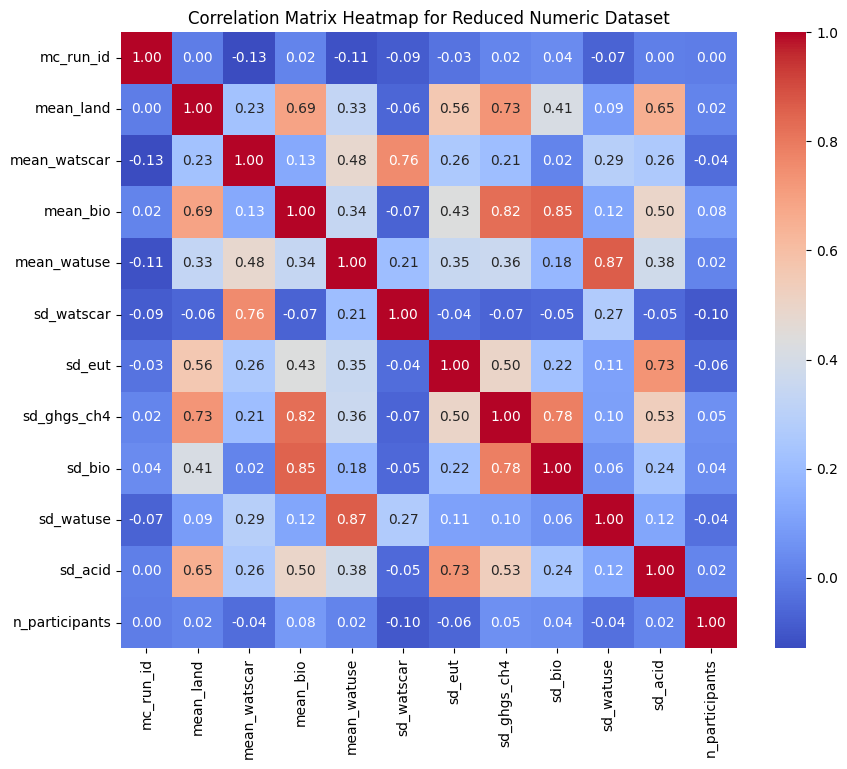

In [ ]:
# Identify the columns to remove without removing 'mean_land'
high_corr_pairs = {
    ('mean_ghgs', 'mean_ghgs_ch4'),
    ('mean_ghgs', 'sd_ghgs'),
    ('mean_eut', 'mean_acid'),
    ('mean_ghgs_n2o', 'sd_ghgs_n2o'),
    ('mean_land', 'sd_ghgs'),
    ('sd_ghgs', 'sd_land'),
    ('mean_ghgs', 'mean_acid'),
    ('mean_ghgs_n2o', 'mean_acid'),
    ('mean_ghgs', 'mean_land'),
    ('mean_land', 'sd_land')
}

# I want to keep 'mean_land' so I will remove the other variable in the pair
columns_to_remove = set()
for col1, col2 in high_corr_pairs:
    if 'mean_land' not in (col1, col2):
        columns_to_remove.add(col1)
        columns_to_remove.add(col2)
    elif 'mean_land' == col1:
        columns_to_remove.add(col2)
    elif 'mean_land' == col2:
        columns_to_remove.add(col1)

# Remove the identified columns from the DataFrame
df_reduced = df.drop(columns=list(columns_to_remove))

# Filter out non-numeric columns to avoid ValueError when calculating correlation
numeric_df_reduced = df_reduced.select_dtypes(include=[np.number])

# Now calculate the correlation matrix on just the numeric columns
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df_reduced.corr(), annot=True, fmt='.2f', square=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap for Reduced Numeric Dataset')
plt.show()

# Now df_reduced will have the reduced set of columns without the highly correlated ones, except for 'mean_land'


In [ ]:
pip install -U kaleido

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 6.3 MB/s eta 0:00:00


In [ ]:
# Define the function to categorize diet groups
def categorize_diet(diet):
    if 'vegan' in diet:
        return 'Plant-based'
    elif 'veggie' in diet:
        return 'Vegetarian'
    elif 'meat100' in diet:
        return 'High meat consumption'
    elif 'meat50-99' in diet:
        return 'Medium meat consumption'
    elif 'fish' in diet:
        return 'Pescatarian'
    else:
        return 'Other'

# Define the function to categorize age groups
def categorize_age(age):
    if age <= 29:
        return 'Young adult'
    elif age <= 39:
        return 'Adult'
    elif age <= 49:
        return 'Mature adult'
    elif age <= 59:
        return 'Senior adult'
    else:
        return 'Elderly'

# Apply the categorize_diet function to the 'diet_group' column
df_reduced['Diet Category'] = df_reduced['diet_group'].apply(categorize_diet)

# Extract the numeric part of the 'age_group', take the first match, convert it to integer, and apply the categorize_age function
df_reduced['Age Group Category'] = df_reduced['age_group'].str.extract('(\d+)')[0].astype(int).apply(categorize_age)

# Create the treemap
fig = px.treemap(df_reduced, path=['Diet Category', 'Age Group Category', 'sex'],
                 values='mean_land',
                 color='mean_land',
                 hover_data=['diet_group'],
                 color_continuous_scale='RdBu',
                 color_continuous_midpoint=np.average(df['mean_land'], weights=df['n_participants']))

# Update the layout if needed
fig.update_layout(margin=dict(t=50, l=25, r=25, b=25))

# Show the figure
fig.show()

In [ ]:
# Save the Plotly figure to an HTML file
html_file_path = '/content/treemap_plot.html'
fig.write_html(html_file_path)


In [ ]:
files.download(html_file_path)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>